In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# **1. Load and Clean Data**

In [3]:
#read dataset
df = pd.read_csv('RecursionCohortData_27339_2001-01-01_2022-07-01_1657909974300.csv')

Now let us look at what the information of our dataset. Chris said that he used -999 for N/A value. There are nan values in both 'Orig LTV Desciption' and  'Credit Score Description' columns, but we don't need to replace those values becuase they are description. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Bank Servicer(Y/N)                    2496 non-null   object 
 1   Orig LTV                              2501 non-null   int64  
 2   Orig LTV Description                  2501 non-null   object 
 3   Credit Score                          2501 non-null   int64  
 4   Credit Score Description              2501 non-null   object 
 5   Factor Date                           2501 non-null   object 
 6   Current Remaining Principal Balance   2501 non-null   float64
 7   Item Count                            2501 non-null   int64  
 8   Weighted Average Gross Coupon         2501 non-null   float64
 9   Weighted Average Maturity             2501 non-null   float64
 10  Weighted Average Loan Age             2501 non-null   float64
 11  Weighted Average 

In [5]:
df.columns

Index(['Bank Servicer(Y/N)', 'Orig LTV', 'Orig LTV Description',
       'Credit Score', 'Credit Score Description', 'Factor Date',
       'Current Remaining Principal Balance ', 'Item Count ',
       'Weighted Average Gross Coupon ', 'Weighted Average Maturity ',
       'Weighted Average Loan Age ', 'Weighted Average Original Loan Size ',
       'Weighted Average Loan Size ', 'Original Loan Amount ', 'CPR 1M ',
       'CDR 1M ', 'CCR 1M (Curtailment) '],
      dtype='object')

In [6]:
df.head()

,Bank Servicer(Y/N),Orig LTV,Orig LTV Description,Credit Score,Credit Score Description,Factor Date,Current Remaining Principal Balance,Item Count,Weighted Average Gross Coupon,Weighted Average Maturity,Weighted Average Loan Age,Weighted Average Original Loan Size,Weighted Average Loan Size,Original Loan Amount,CPR 1M,CDR 1M,CCR 1M (Curtailment)
0,N,-999,N.A.,-999,N.A.,7/1/2022,2.177325e+10,147332,4.406054,338.912020,91.007777,236477.4371,202495.7865,2.630744e+10,NaN,NaN,NaN
1,N,-999,N.A.,680,<=680,7/1/2022,7.269392e+07,636,3.630607,329.901856,28.439182,145947.9172,139133.1410,7.708400e+07,NaN,NaN,NaN
2,N,-999,N.A.,750,>680 and <=750,7/1/2022,7.726510e+07,620,3.434372,331.560343,23.936819,162110.3959,154341.8838,8.115500e+07,NaN,NaN,NaN
3,N,-999,N.A.,29999,>750,7/1/2022,3.129921e+07,245,3.346467,327.675719,25.915448,174182.9081,164687.4867,3.394000e+07,NaN,NaN,NaN
4,N,80,<=80,-999,N.A.,7/1/2022,5.170670e+08,3850,4.058299,260.348302,51.254905,268204.3842,240469.7537,6.569670e+08,NaN,NaN,NaN


In [7]:
#replace nan values by 0, and replace the initial dataframe
df.fillna(0,inplace = True)

# **2. Data Visualization**

In [8]:
#sort data by 'Factor Date' from old to new
df.sort_values(by=['Factor Date'], ascending=True, inplace=True)
df['Factor Date']=pd.to_datetime(df['Factor Date'])
df = df[df['Factor Date'] < '2022-7-1']

Now, let us plot some graphs. 

<AxesSubplot:xlabel='Factor Date', ylabel='CPR 1M '>

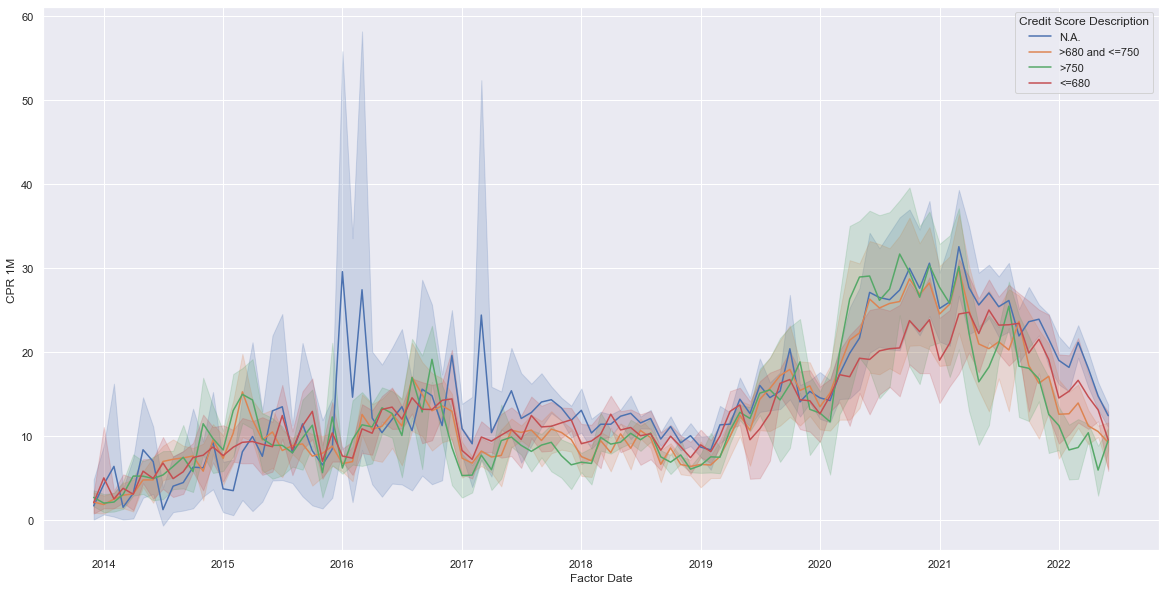

In [9]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df, x='Factor Date', y= 'CPR 1M ', hue ='Credit Score Description')

<AxesSubplot:xlabel='Factor Date', ylabel='CPR 1M '>

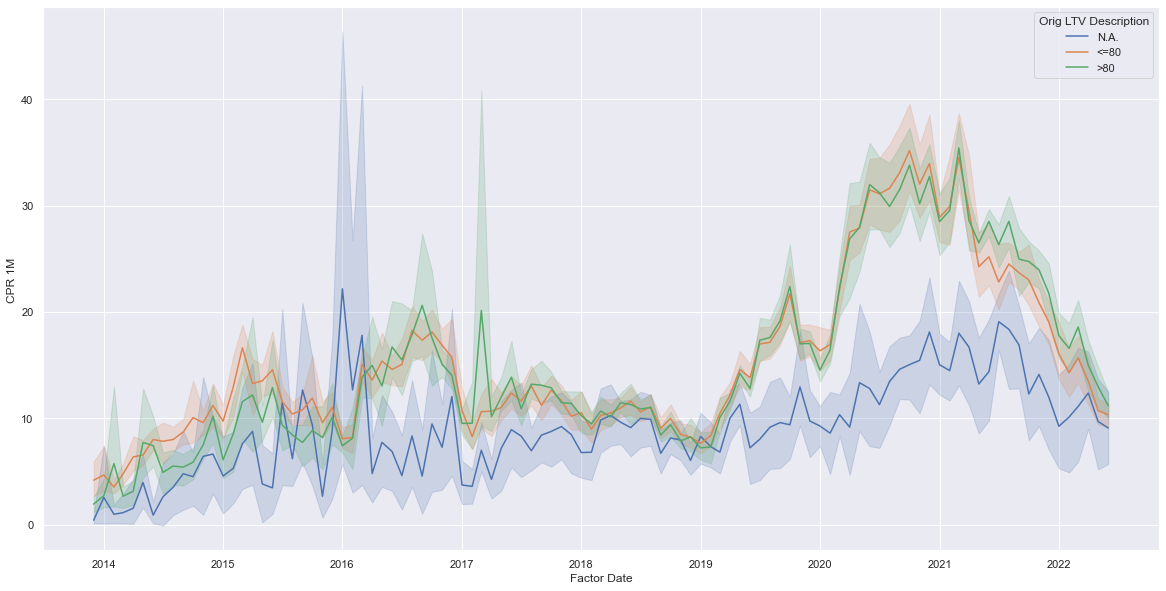

In [10]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df, x='Factor Date', y= 'CPR 1M ', hue ='Orig LTV Description')

It seems like that we have too many data in 'Factor Date' and we can not see every single date very clearly. Let us look a specific period. I am interested in covid period, so I plot graph from 2020-2022. 

In [11]:
#define dataframe after covid time
df_covid = df[df['Factor Date']>'2019-12-1']

In [12]:
df_covid.head()

,Bank Servicer(Y/N),Orig LTV,Orig LTV Description,Credit Score,Credit Score Description,Factor Date,Current Remaining Principal Balance,Item Count,Weighted Average Gross Coupon,Weighted Average Maturity,Weighted Average Loan Age,Weighted Average Original Loan Size,Weighted Average Loan Size,Original Loan Amount,CPR 1M,CDR 1M,CCR 1M (Curtailment)
727,N,-999,N.A.,750,>680 and <=750,2020-01-01,9.050025e+07,674,4.415835,357.897893,62.742825,176130.4065,159539.4468,9.999800e+07,9.488754,0.0,0.212392
735,N,29999,>80,750,>680 and <=750,2020-01-01,2.797380e+11,1302677,4.351093,317.636102,31.058750,286650.2389,271461.7129,2.996010e+11,16.726801,0.0,0.416761
728,N,-999,N.A.,29999,>750,2020-01-01,1.903624e+07,169,4.285623,317.461956,56.052210,171346.2301,150681.5697,2.230100e+07,5.043276,0.0,2.404894
729,N,80,<=80,-999,N.A.,2020-01-01,6.538415e+08,4673,4.527041,292.307395,53.053017,246066.8046,220007.9261,7.883150e+08,22.320664,0.0,1.650345
730,N,80,<=80,680,<=680,2020-01-01,1.393960e+11,822997,4.550802,292.705561,37.996532,257684.0772,239115.6967,1.543120e+11,18.509062,0.0,0.457410


Now, let us plot graph for this specific period of time. 

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df_covid, x='Factor Date', y= 'CPR 1M ', hue ='Credit Score Description')

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=df_covid, x='Factor Date', y= 'CPR 1M ', hue ='Orig LTV Description')

You guys can play around by changing 'hue' to other categorial features

In [ ]:
sns.boxplot(x="Credit Score Description", y="CPR 1M ", data=df)

In [ ]:
sns.boxplot(x='Orig LTV Description', y="CPR 1M ", data=df)

# **3. Statistical Analysis**

Now, I  make a correlation matrix plot to see their correlations.

In [ ]:
# import library
import matplotlib.pyplot as plt

In [ ]:
# Identiy numerical features
num_features = pd.Index(['Current Remaining Principal Balance ', 'Item Count ', 
 'Weighted Average Gross Coupon ', 'Weighted Average Maturity ','Weighted Average Loan Age ', 
 'Weighted Average Original Loan Size ','Weighted Average Loan Size ', 'Original Loan Amount ', 'CPR 1M '])

In [ ]:
# Define a dataframe that only contains numerical features
num_df = df[num_features]

In [ ]:
# Correlation matrix
cormat = num_df.corr()
round(cormat, 2)

I inlcude the feature 'Itemm Count' just because it is a numerical feature. We can just ignore now. Let us look at the last column or last row. We observe that 'Weighted Average Maturity' has negative correlation with 'CPR 1M'. The 'Weighted Average Gross Coupon' has almost zero correlation. Two features that has relatively high correlation are 'Weighted Average Original Loan Size' and 'Weighted Average Loan Size'. The correlation between 'Weighted Average Original Loan Size' and 'Weighted Average Loan Size' is 0.99, which is very close to 1. We can ignore one of them when we build up a model. 

Now, let us drop 'Item Count' and 'Weighted Average Original Loan Size' to plot a clear graph. 

In [ ]:
df_new = num_df.drop(['Item Count ', 'Weighted Average Original Loan Size '], axis=1)
cormat_new = df_new.corr()
sns.heatmap(cormat_new)

# **Define and Train Model**

To be continued....